In [1]:
import os
# disable all wandb behaviors
os.environ["WANDB_MODE"] = "disabled"
os.environ["WANDB_SILENT"] = "true"

# Full fine-tuning

In [2]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5/
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17485, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 17485 (delta 80), reused 31 (delta 31), pack-reused 17376 (from 3)
Receiving objects: 100% (17485/17485), 16.33 MiB | 25.69 MiB/s, done.
Resolving deltas: 100% (11984/11984), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 58.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.7 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.5.0
    Uninstalling Pillow-9.5.0:
      Successfully uninstalled Pillow-9.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.

In [3]:
%pwd

'/kaggle/working/yolov5'

In [4]:
!pip install ultralytics

In [5]:
from ultralytics import YOLO
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
import yaml
import torch
from tensorflow.keras.applications.vgg16 import VGG16
os.path.isdir('/kaggle/input/dataset')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


True

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
with open("/kaggle/input/dataset/data.yaml") as stream:
    print(yaml.safe_load(stream))

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 15, 'names': ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop'], 'roboflow': {'workspace': 'selfdriving-car-qtywx', 'project': 'self-driving-cars-lfjou', 'version': 6, 'license': 'CC BY 4.0', 'url': 'https://universe.roboflow.com/selfdriving-car-qtywx/self-driving-cars-lfjou/dataset/6'}}


In [7]:
import shutil

source_dir = '/kaggle/input/dataset/'
destination_dir = '/kaggle/working/yolov5/'

shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)

'/kaggle/working/yolov5/'

In [8]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 30 --data /kaggle/working/yolov5/data.yaml --weights yolov5s.pt --cache --workers 2

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


W&B disabled.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=yolov5s.pt, cfg=, data=/kaggle/working/yolov5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 torch-2.4.0 CUDA:0 (T

In [9]:
print(os.listdir('/kaggle/working/yolov5'))

['train', 'yolov5s.pt', 'train.py', 'README.md', 'benchmarks.py', '.dockerignore', 'README.roboflow.txt', 'runs', '.gitignore', 'README.dataset.txt', 'valid', 'tutorial.ipynb', 'pyproject.toml', '.git', 'wandb', 'val.py', '__pycache__', 'test', 'models', 'hubconf.py', '.gitattributes', 'segment', 'requirements.txt', 'utils', '.github', 'classify', 'detect.py', 'CONTRIBUTING.md', 'CITATION.cff', 'export.py', 'data', 'LICENSE', 'data.yaml', 'README.zh-CN.md']


## Evaluation

In [10]:
!python val.py \
  --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt \
  --data /kaggle/working/yolov5/data.yaml \
  --img 416 \
  --iou 0.65 \
  --task val

val: data=/kaggle/working/yolov5/data.yaml, weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /kaggle/working/yolov5/valid/labels.cache... 801 images, 0 backgro
                 Class     Images  Instances          P          R      mAP50   
                   all        801        944      0.925      0.879      0.937       0.79
           Green Light        801        122      0.813      0.712      0.808      0.454
             Red Light        801        108      0.833      0.739      0.789

In [11]:
os.path.isfile('/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg')

True

In [12]:
!python detect.py --source /kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt

detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg: 640x640 1 Speed Limit 30, 6.2ms
Speed: 0.5ms pre-process, 6.2ms inference, 155.5ms NMS per image at shape (1, 3, 640, 64

In [13]:
!ls runs/detect/exp

000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg


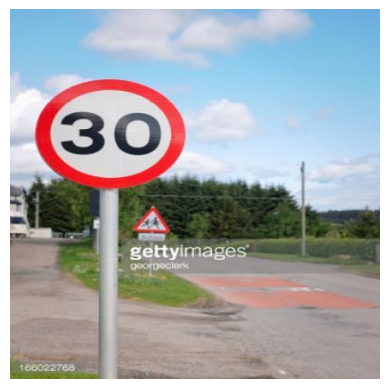

In [14]:
import matplotlib.pyplot as plt

image_path = '/kaggle/working/yolov5/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

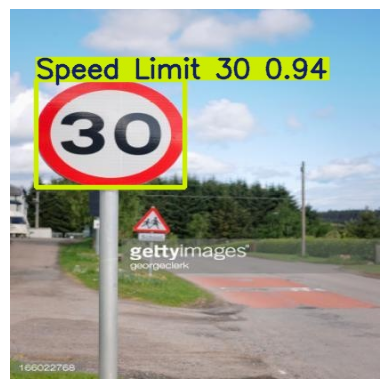

In [15]:
detect_path = '/kaggle/working/yolov5/runs/detect/exp/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'
os.path.isfile(detect_path)
detect_image = cv2.imread(detect_path)
detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

plt.imshow(detect_image)
plt.axis('off')
plt.show()

# Train with LoRA

In [8]:
!pip install --upgrade pip
!pip install loralib                                    

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.2 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.0
    Uninstalling pip-24.0:
      Successfully uninstalled pip-24.0


In [9]:
!wandb disabled
%cd /kaggle/working/yolov5
!pip install --upgrade pillow>=10.3.0

W&B disabled.
/kaggle/working/yolov5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pointpats 2.5.0 requires shapely>=2, but you have shapely 1.8.5.post1 which is incompatible.
spopt 0.6.1 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.


In [10]:
!pip uninstall torch torchaudio -y
!pip install torch==2.0.1 torchvision==0.15.2

Found existing installation: torch 2.4.0
Uninstalling torch-2.4.0:
  Successfully uninstalled torch-2.4.0
Found existing installation: torchaudio 2.4.0
Uninstalling torchaudio-2.4.0:
  Successfully uninstalled torchaudio-2.4.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 60.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 100.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 137.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 162.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 62.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 112.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 122.9 MB/s eta 0:00:0000:01
   ━━

In [12]:
import sys
sys.path.insert(0, "/kaggle/working/yolov5")
import loralib as lora
import torch.nn as nn
import math
from models.common import Conv
device = "cuda" if torch.cuda.is_available() else "cpu"

class LoRAConv(nn.Module):
    def __init__(self, conv: Conv, r=4, lora_alpha=1.0, dropout=0.0):
        super().__init__()
        # keep original block
        self.conv_block = conv

        # underlying Conv2d
        in_ch  = conv.conv.in_channels
        out_ch = conv.conv.out_channels

        # LoRA down/up as 1×1 convs
        self.lora_down = nn.Conv2d(in_ch,  r, kernel_size=1, bias=False)
        self.lora_up   = nn.Conv2d(r, out_ch, kernel_size=1, bias=False)

        # scaling and optional dropout
        self.scaling = lora_alpha / r
        self.dropout = nn.Dropout2d(dropout) if dropout > 0 else nn.Identity()

        # init
        nn.init.kaiming_uniform_(self.lora_down.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_up.weight)

    def forward(self, x):
        # base pass through the original Conv→BN→Act block
        base = self.conv_block(x)

        # low-rank delta
        delta = self.lora_up(self.dropout(self.lora_down(x))) * self.scaling

        return base + delta

/opt/conda/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/opt/conda/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [13]:
import torch
import loralib as lora
import torch.nn as nn
import math
from models.common import Conv
def apply_lora(module, r=4, alpha=1.0, dropout=0.0):
    """
    Replace every models.common.Conv under `module` with LoRAConv.
    """
    for name, child in module.named_children():
        apply_lora(child, r, alpha, dropout)
        if isinstance(child, Conv):
            setattr(module, name, LoRAConv(child, r=r, lora_alpha=alpha, dropout=dropout))

import sys
import __main__
__main__.LoRAConv = LoRAConv
orig_ckpt = torch.hub.load_state_dict_from_url(
    'https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt',
    map_location=device
)

yolo_model = orig_ckpt['model']           # this is a DetectionModel instance
yolo_model.train()

apply_lora(yolo_model.model, r=8, alpha=16, dropout=0.1)

for n, p in yolo_model.named_parameters():
    p.requires_grad = 'lora_' in n

print(f"{sum(p.requires_grad for p in yolo_model.parameters())} LoRA parameters will be trained")

orig_ckpt['model'] = yolo_model
torch.save(orig_ckpt, 'lora_yolov5s_ckpt.pt')
print("Saved modified checkpoint ➞ lora_yolov5s_ckpt.pt")

Downloading: "https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt" to /root/.cache/torch/hub/checkpoints/yolov5s.pt
100%|██████████| 14.1M/14.1M [00:00<00:00, 193MB/s]


114 LoRA parameters will be trained
Saved modified checkpoint ➞ lora_yolov5s_ckpt.pt


In [14]:
lora_code = """
import torch.nn as nn
import math

class LoRAConv(nn.Module):
    def __init__(self, conv_block: nn.Module, r=4, lora_alpha=1.0, dropout=0.0):
        super().__init__()
        self.conv_block = conv_block
        in_ch  = conv_block.conv.in_channels
        out_ch = conv_block.conv.out_channels

        self.lora_down = nn.Conv2d(in_ch,  r, kernel_size=1, bias=False)
        self.lora_up   = nn.Conv2d(r, out_ch, kernel_size=1, bias=False)
        self.scaling   = lora_alpha / r
        self.dropout   = nn.Dropout2d(dropout) if dropout > 0 else nn.Identity()

        nn.init.kaiming_uniform_(self.lora_down.weight, a=math.sqrt(5))
        nn.init.zeros_(self.lora_up.weight)

    def forward(self, x):
        base  = self.conv_block(x)
        delta = self.lora_up(self.dropout(self.lora_down(x))) * self.scaling
        return base + delta
"""

with open("/kaggle/working/yolov5/lora_module.py", "w") as f:
    f.write(lora_code)

In [15]:
train_path = "/kaggle/working/yolov5/train.py"
with open(train_path, "r") as f:
    lines = f.readlines()

# Insert import at the top after existing imports
for idx, line in enumerate(lines):
    if line.strip().startswith("import"):
        continue
    lines.insert(idx, "from lora_module import LoRAConv\n")
    break

# Write back
with open(train_path, "w") as f:
    f.writelines(lines)

In [16]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/dataset/train/images
val: /kaggle/input/dataset/valid/images
test: /kaggle/input/dataset/test/images

nc: 15
names: ['Green Light', 'Red Light', 'Speed Limit 10', 'Speed Limit 100', 'Speed Limit 110', 'Speed Limit 120', 'Speed Limit 20', 'Speed Limit 30', 'Speed Limit 40', 'Speed Limit 50', 'Speed Limit 60', 'Speed Limit 70', 'Speed Limit 80', 'Speed Limit 90', 'Stop']

Writing /kaggle/working/data.yaml


In [28]:
!wandb disabled
!python train.py \
  --data /kaggle/working/data.yaml \
  --weights lora_yolov5s_ckpt.pt \
  --batch 16 \
  --img 416 \
  --epochs 80 \
  --project lora-yolov5 \
  --name exp1

W&B disabled.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
train: weights=lora-yolov5/exp1/weights/best.pt, cfg=, data=/kaggle/working/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=lora-yolov5, name=exp1, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 tor

In [32]:
!python val.py \
  --weights lora-yolov5/exp12/weights/best.pt \
  --data /kaggle/working/data.yaml \
  --img 416 \
  --iou 0.65 \
  --task val

val: data=/kaggle/working/data.yaml, weights=['lora-yolov5/exp12/weights/best.pt'], batch_size=32, imgsz=416, conf_thres=0.001, iou_thres=0.65, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 torch-2.0.1+cu117 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
val: Scanning /kaggle/input/dataset/valid/labels... 801 images, 0 backgrounds, 0
val: WARNING ⚠️ Cache directory /kaggle/input/dataset/valid is not writeable: [Errno 30] Read-only file system: '/kaggle/input/dataset/valid/labels.cache.npy'
                 Class     Images  Instances          P          R      mAP50   
                   all        801        944      0.907      0.829      0.905      0.755
           Green Light      

In [34]:
!python detect.py --source /kaggle/input/dataset/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg --weights lora-yolov5/exp12/weights/best.pt

detect: weights=['lora-yolov5/exp12/weights/best.pt'], source=/kaggle/input/dataset/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-418-ga493afe1 Python-3.10.14 torch-2.0.1+cu117 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)

Fusing layers... 
Model summary: 157 layers, 7050580 parameters, 0 gradients, 15.9 GFLOPs
image 1/1 /kaggle/input/dataset/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg: 640x640 1 Speed Limit 30, 6.2ms
Speed: 0.6ms pre-process, 6.2ms inference, 2.6ms NMS per image at shape (1, 3, 640, 640)
Results saved t

In [35]:
!ls runs/detect/exp3

000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg


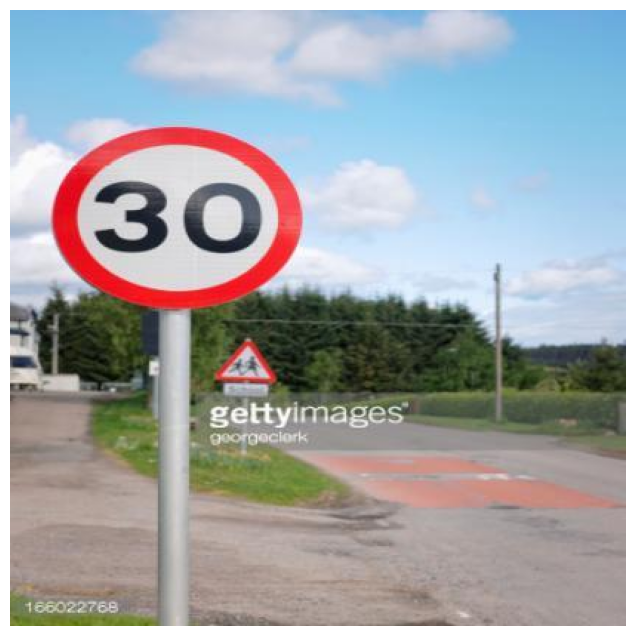

In [36]:
%matplotlib inline
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display

image_path = '/kaggle/input/dataset/valid/images/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()

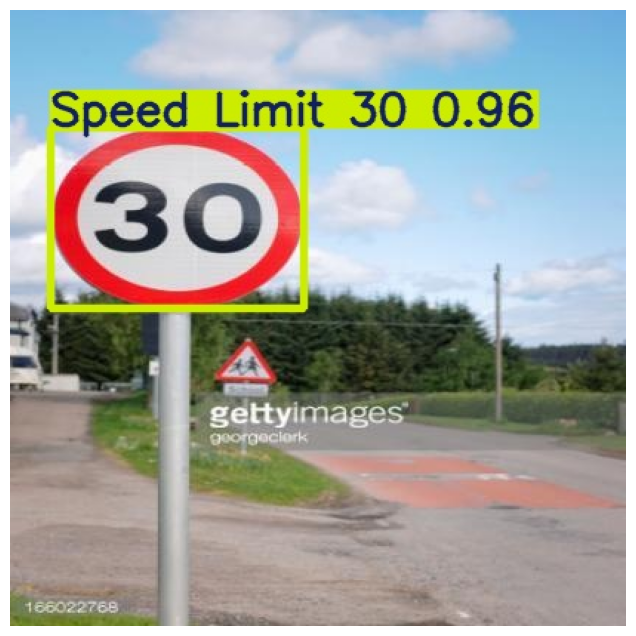

In [37]:
detect_path = './runs/detect/exp3/000001_jpg.rf.5eb4f984823b1a44afc9bf98804daa50.jpg'

detect_image = cv2.imread(detect_path)
detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,8))
plt.imshow(detect_image)
plt.axis('off')
plt.show()